# cadCAD Experiment

In [1]:
import matplotlib.pyplot as plt
from model.run import run

df = run()

print(df)

x119...   
30        158.885551  {0: <model.model.broker.Broker object at 0x119...   
36        125.015192  {0: <model.model.broker.Broker object at 0x119...   
42        168.295764  {0: <model.model.broker.Broker object at 0x119...   
48        156.899078  {0: <model.model.broker.Broker object at 0x119...   
54        173.612403  {0: <model.model.broker.Broker object at 0x119...   
60        151.303598  {0: <model.model.broker.Broker object at 0x119...   
66        179.825183  {0: <model.model.broker.Broker object at 0x119...   
72        167.541563  {0: <model.model.broker.Broker object at 0x119...   
78        172.642747  {0: <model.model.broker.Broker object at 0x119...   
84        160.449520  {0: <model.model.broker.Broker object at 0x119...   
90        168.619523  {0: <model.model.broker.Broker object at 0x119...   
96        179.273403  {0: <model.model.broker.Broker object at 0x119...   
102       166.103708  {0: <model.model.broker.Broker object at 0x119...   
108       188.

Text(0,0.5,'Broker Holdings')

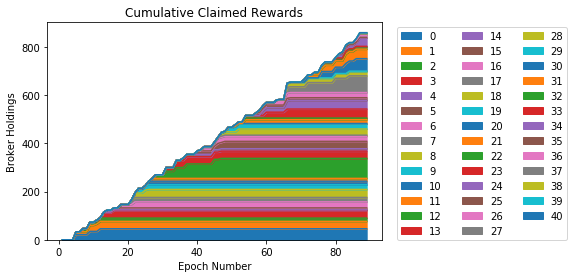

In [2]:
import pandas as pd
df1 = df.reset_index().brokers

broker_holdings = {}
timestep = 0
for broker_dict in df1:
    for broker_id, broker in broker_dict.items():
        if broker_id not in broker_holdings:
            broker_holdings[broker_id] = {}
        broker_holdings[broker_id][timestep] = broker.holdings
        
    timestep += 1

df_plot = pd.DataFrame(broker_holdings)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(1.3, 1), ncol=3)
plt.title('Cumulative Claimed Rewards')
plt.xlabel('Epoch Number')
plt.ylabel('Broker Holdings')

Text(0,0.5,'Broker Claimable Funds')

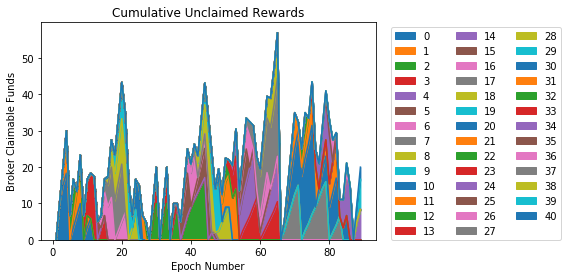

In [3]:
import pandas as pd
df1 = df.reset_index().brokers

broker_claimable = {}
timestep = 0
for broker_dict in df1:
    for broker_id, broker in broker_dict.items():
        if broker_id not in broker_claimable:
            broker_claimable[broker_id] = {}
        broker_claimable[broker_id][timestep] = broker.claimable_funds
        
    timestep += 1

df_plot = pd.DataFrame(broker_claimable)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(1.3, 1), ncol=3)
plt.title('Cumulative Unclaimed Rewards')
plt.xlabel('Epoch Number')
plt.ylabel('Broker Claimable Funds')

Text(0.5,1,'Capital in the Agreement')

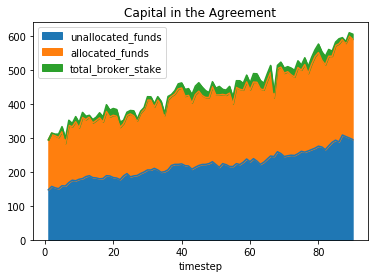

In [4]:
df.plot(x='timestep', y=['unallocated_funds', 'allocated_funds', 'total_broker_stake'],kind='area')
plt.title('Capital in the Agreement')

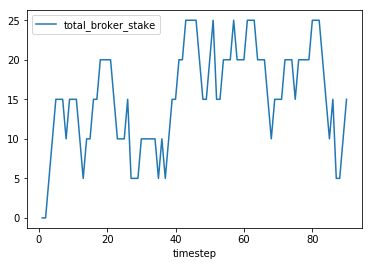

In [5]:
df.plot(x='timestep',y='total_broker_stake')

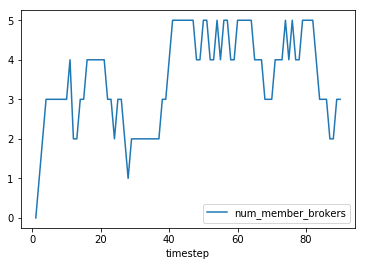

In [8]:
df.plot(x='timestep',y='num_member_brokers')

In [15]:
df['members'] = df.brokers.apply(lambda x: [v.id for v in x.values() if v.member])

In [16]:
df.members

6                        []
12                      [0]
18                   [0, 1]
24                [0, 1, 2]
30                [0, 1, 2]
36                [0, 1, 2]
42                [0, 1, 2]
48                [0, 1, 3]
54                [0, 1, 3]
60                [0, 1, 3]
66             [0, 1, 3, 4]
72                   [0, 3]
78                   [3, 5]
84                [3, 5, 6]
90                [3, 6, 7]
96             [3, 6, 7, 8]
102            [6, 7, 8, 9]
108            [6, 7, 8, 9]
114            [6, 7, 8, 9]
120            [6, 7, 8, 9]
126            [6, 7, 8, 9]
132               [6, 8, 9]
138              [8, 9, 10]
144                 [8, 10]
150             [8, 10, 11]
156             [8, 10, 11]
162                [11, 12]
168                    [12]
174                [12, 13]
180                [12, 13]
               ...         
366    [23, 24, 26, 27, 28]
372    [23, 24, 26, 27, 28]
378    [23, 24, 26, 27, 28]
384    [23, 24, 27, 28, 29]
390        [23, 24, 

In [17]:
broker_ids = [v.id for v in df.brokers.values[-1].values()]

In [19]:
df['broker_stakes'] = df.brokers.apply(lambda x: [(v.member, v.stake) for v in x.values()])

In [25]:
def check(x):
    if x[0]:
        if x[1]==5:
            #return "member with correct stake"
            return True
        else:
            #return "member with incorrect stake"
            return False
    else:
        if x[1]==0:
            #return "nonmember with correct stake"
            return True
        else:
            #return "nonmember with incorrect stake"
            return False

In [26]:
df.broker_stakes.apply(lambda z: [check(x) for x in z])  

6                                                     []
12                                                [True]
18                                          [True, True]
24                                    [True, True, True]
30                                    [True, True, True]
36                                    [True, True, True]
42                                    [True, True, True]
48                              [True, True, True, True]
54                              [True, True, True, True]
60                              [True, True, True, True]
66                        [True, True, True, True, True]
72                        [True, True, True, True, True]
78                  [True, True, True, True, True, True]
84            [True, True, True, True, True, True, True]
90      [True, True, True, True, True, True, True, True]
96     [True, True, True, True, True, True, True, Tru...
102    [True, True, True, True, True, True, True, Tru...
108    [True, True, True, True,

In [31]:
df['broker_based_total_stake'] = df.broker_stakes.apply(lambda z: sum([x[1] for x in z if x[0]]))

In [32]:
df.total_broker_stake

6       0
12      0
18      5
24     10
30     15
36     15
42     15
48     10
54     15
60     15
66     15
72     10
78      5
84     10
90     10
96     15
102    15
108    20
114    20
120    20
126    20
132    15
138    10
144    10
150    10
156    15
162     5
168     5
174     5
180    10
       ..
366    25
372    25
378    25
384    20
390    20
396    20
402    15
408    10
414    15
420    15
426    15
432    20
438    20
444    20
450    15
456    20
462    20
468    20
474    20
480    25
486    25
492    25
498    20
504    15
510    10
516    15
522     5
528     5
534    10
540    15
Name: total_broker_stake, Length: 90, dtype: int64

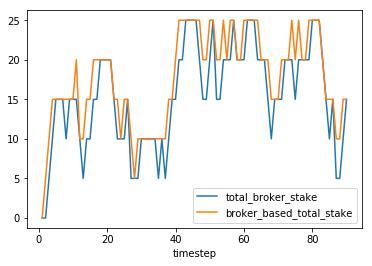

In [33]:
df.plot(x='timestep', y=['total_broker_stake', 'broker_based_total_stake'])